# Visualisation Géographique des données Netflix

Ce notebook présente une analyse géographique des contenus disponibles sur Netflix à travers le monde, basée sur le fichier `netflix_titles.csv`.


## 1. Installation et importation des bibliothèques nécessaires


In [ ]:
# Installation des bibliothèques nécessaires
# Décommentez et exécutez ces lignes si vous n'avez pas déjà installé ces bibliothèques
# %pip install folium
# %pip install pandas
# %pip install matplotlib
# %pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


## 2. Chargement et préparation des données


In [27]:
# Chargement des données Netflix
try:
    df = pd.read_csv('archive/netflix_titles.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('archive/netflix_titles.csv', encoding='latin1')

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Extraire uniquement les pays et se concentrer sur les pays qui ont un nombre significatif de productions
countries_series = df['country'].dropna()

countries_list = []
for countries in countries_series:
    if isinstance(countries, str):
        for country in countries.split(','):
            countries_list.append(country.strip())

country_counts = pd.Series(countries_list).value_counts()

top_countries = country_counts.head(15)
print("Top 15 des pays avec le plus de productions Netflix:")
top_countries


Top 15 des pays avec le plus de productions Netflix:


United States     3691
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        232
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Name: count, dtype: int64

In [29]:
# Créer un dictionnaire pour les coordonnées géographiques des pays importants
geo_coords = {
    'United States': {'lat': 39.8283, 'lon': -98.5795},
    'India': {'lat': 20.5937, 'lon': 78.9629},
    'United Kingdom': {'lat': 55.3781, 'lon': -3.4360},
    'South Korea': {'lat': 35.9078, 'lon': 127.7669},
    'Japan': {'lat': 36.2048, 'lon': 138.2529},
    'France': {'lat': 46.2276, 'lon': 2.2137},
    'Canada': {'lat': 56.1304, 'lon': -106.3468},
    'Spain': {'lat': 40.4637, 'lon': -3.7492},
    'Germany': {'lat': 51.1657, 'lon': 10.4515},
    'Mexico': {'lat': 23.6345, 'lon': -102.5528},
    'Australia': {'lat': -25.2744, 'lon': 133.7751},
    'Italy': {'lat': 41.8719, 'lon': 12.5674},
    'Brazil': {'lat': -14.2350, 'lon': -51.9253},
    'Taiwan': {'lat': 23.6978, 'lon': 120.9605},
    'Turkey': {'lat': 38.9637, 'lon': 35.2433},
    'Egypt': {'lat': 26.8206, 'lon': 30.8025},
    'Thailand': {'lat': 15.8700, 'lon': 100.9925},
    'Argentina': {'lat': -38.4161, 'lon': -63.6167},
    'Hong Kong': {'lat': 22.3193, 'lon': 114.1694},
    'Russia': {'lat': 61.5240, 'lon': 105.3188},
    'South Africa': {'lat': -30.5595, 'lon': 22.9375},
    'Indonesia': {'lat': -0.7893, 'lon': 113.9213},
    'Nigeria': {'lat': 9.0820, 'lon': 8.6753},
    'Poland': {'lat': 51.9194, 'lon': 19.1451},
    'Philippines': {'lat': 12.8797, 'lon': 121.7740},
    'Belgium': {'lat': 50.5039, 'lon': 4.4699},
    'Netherlands': {'lat': 52.1326, 'lon': 5.2913},
    'Switzerland': {'lat': 46.8182, 'lon': 8.2275},
    'China': {'lat': 35.8617, 'lon': 104.1954},
    'Singapore': {'lat': 1.3521, 'lon': 103.8198}
}

significant_countries = country_counts[country_counts >= 20].reset_index()
significant_countries.columns = ['Pays', 'Nombre_de_productions']

geo_data = []
for _, row in significant_countries.iterrows():
    country = row['Pays']
    if country in geo_coords:
        geo_data.append({
            'Pays': country,
            'Nombre_de_productions': int(row['Nombre_de_productions']),
            'Latitude': geo_coords[country]['lat'],
            'Longitude': geo_coords[country]['lon']
        })

geo_df = pd.DataFrame(geo_data)

# Afficher les données
geo_df.head(10)


,Pays,Nombre_de_productions,Latitude,Longitude
0,United States,3691,39.8283,-98.5795
1,India,1046,20.5937,78.9629
2,United Kingdom,806,55.3781,-3.4360
3,Canada,445,56.1304,-106.3468
4,France,393,46.2276,2.2137
5,Japan,318,36.2048,138.2529
6,Spain,232,40.4637,-3.7492
7,South Korea,232,35.9078,127.7669
8,Germany,226,51.1657,10.4515
9,Mexico,169,23.6345,-102.5528


## 3. Visualisation mondiale avec Folium


In [30]:
# Créer une carte centrée sur le monde
map_center = [20, 0]  
m_netflix = folium.Map(location=map_center, zoom_start=2, tiles="CartoDB positron")

for idx, row in geo_df.iterrows():
    popup_text = f"""
    <b>{row['Pays']}</b><br>
    Nombre de productions: {row['Nombre_de_productions']:,}<br>
    """
    
    radius = (row['Nombre_de_productions'] / 50) ** 0.5 * 100000
    
    if row['Nombre_de_productions'] > 1000:
        color = 'red'
    elif row['Nombre_de_productions'] > 500:
        color = 'orange'
    elif row['Nombre_de_productions'] > 200:
        color = 'blue'
    else:
        color = 'green'
    
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,  
        popup=popup_text,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.4
    ).add_to(m_netflix)

m_netflix


## 4. Visualisation avec clusters


In [31]:
# Créer une carte avec clusters
m_cluster = folium.Map(location=map_center, zoom_start=2, tiles="CartoDB positron")

marker_cluster = MarkerCluster().add_to(m_cluster)

for idx, row in geo_df.iterrows():
    popup_text = f"""
    <b>{row['Pays']}</b><br>
    Nombre de productions: {row['Nombre_de_productions']:,}<br>
    """
    
    if row['Nombre_de_productions'] > 1000:
        icon_color = 'red'
        icon_name = 'film'
    elif row['Nombre_de_productions'] > 500:
        icon_color = 'orange'
        icon_name = 'film'
    elif row['Nombre_de_productions'] > 200:
        icon_color = 'blue'
        icon_name = 'film'
    else:
        icon_color = 'green'
        icon_name = 'film'
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color=icon_color, icon=icon_name, prefix='fa')
    ).add_to(marker_cluster)

m_cluster


## 5. Visualisation avec Plotly Express


In [32]:
# Visualisation avec Plotly Express
fig = px.scatter_geo(
    geo_df, 
    lat='Latitude', 
    lon='Longitude',
    hover_name='Pays',
    size='Nombre_de_productions',  
    color='Nombre_de_productions',  
    projection='natural earth',
    color_continuous_scale=px.colors.sequential.Plasma,
    size_max=40,  
    title='Productions Netflix par pays',
)

fig.update_layout(
    title='Productions Netflix par pays',
    title_x=0.5,  
    coloraxis_colorbar=dict(
        title="Nombre de productions"
    )
)

fig.show()


## 6. Analyse des pays producteurs de contenu Netflix


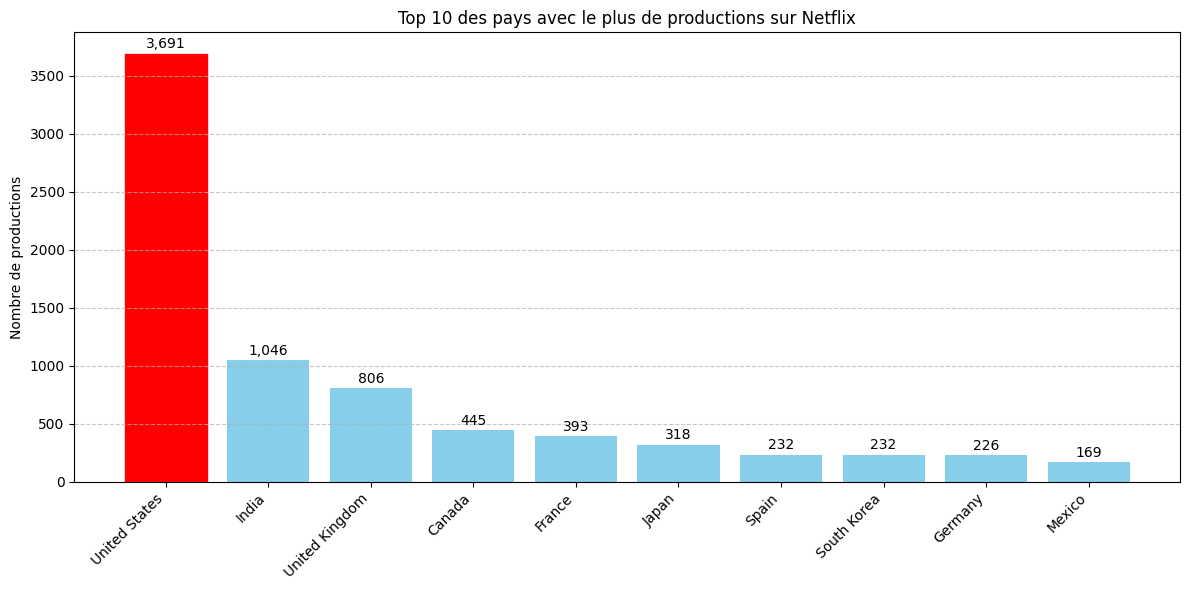

In [33]:
# Analyse du top 10 des pays producteurs de contenu Netflix
top_10 = geo_df.sort_values('Nombre_de_productions', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10['Pays'], top_10['Nombre_de_productions'], color='skyblue')

for i, pays in enumerate(top_10['Pays']):
    if pays == 'United States':
        bars[i].set_color('red')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'{int(height):,}',
            ha='center', va='bottom', rotation=0)

plt.title('Top 10 des pays avec le plus de productions sur Netflix')
plt.ylabel('Nombre de productions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## 7. Analyse des types de contenu par pays


In [34]:
# Initialiser les listes pour stocker les données
pays = []
films = []
series = []

for country in top_10['Pays']:
    pays.append(country)
    movie_count = df[(df['country'].str.contains(country, na=False)) & 
                     (df['type'] == 'Movie')].shape[0]
    films.append(movie_count)
    
    show_count = df[(df['country'].str.contains(country, na=False)) & 
                    (df['type'] == 'TV Show')].shape[0]
    series.append(show_count)

content_type_df = pd.DataFrame({
    'Pays': pays,
    'Films': films,
    'Séries TV': series
})

content_type_df


,Pays,Films,Séries TV
0,United States,2753,938
1,India,962,84
2,United Kingdom,534,272
3,Canada,319,126
4,France,303,90
5,Japan,119,199
6,Spain,171,61
7,South Korea,61,171
8,Germany,185,46
9,Mexico,111,58


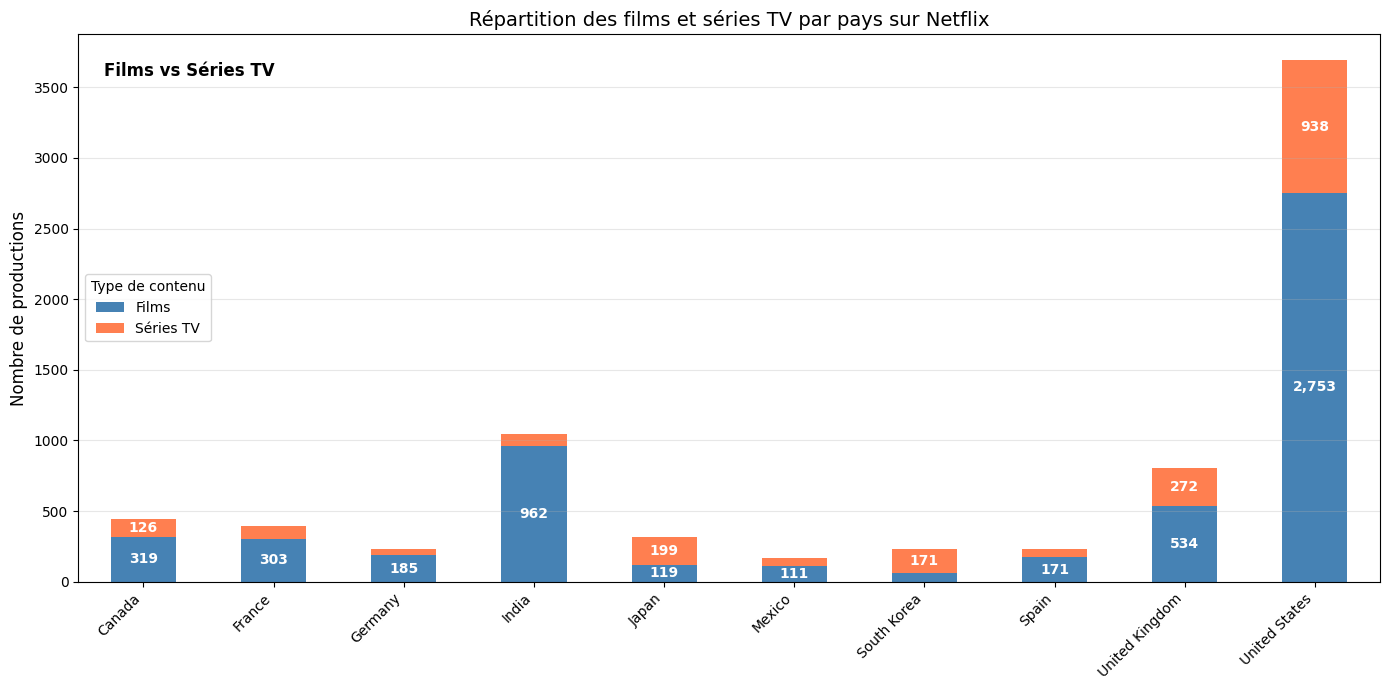

In [35]:
# Visualisation des types de contenu par pays
# Préparation des données pour le graphique empilé
content_type_df_melted = pd.melt(content_type_df, 
                               id_vars=['Pays'], 
                               value_vars=['Films', 'Séries TV'],
                               var_name='Type de contenu', 
                               value_name='Nombre')

plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

chart = content_type_df_melted.pivot(index='Pays', columns='Type de contenu', values='Nombre').plot(
    kind='bar', 
    stacked=True, 
    ax=ax,
    color=['steelblue', 'coral']
)

for c in ax.containers:
    ax.bar_label(c, labels=[f'{int(v):,}' if v > 100 else '' for v in c.datavalues], 
                label_type='center', color='white', fontweight='bold')

plt.title('Répartition des films et séries TV par pays sur Netflix', fontsize=14)
plt.ylabel('Nombre de productions', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.text(0.02, 0.95, 'Films vs Séries TV', transform=ax.transAxes, 
         fontsize=12, fontweight='bold', va='top')

plt.tight_layout()
plt.show()


## 8. Analyse de la production par année


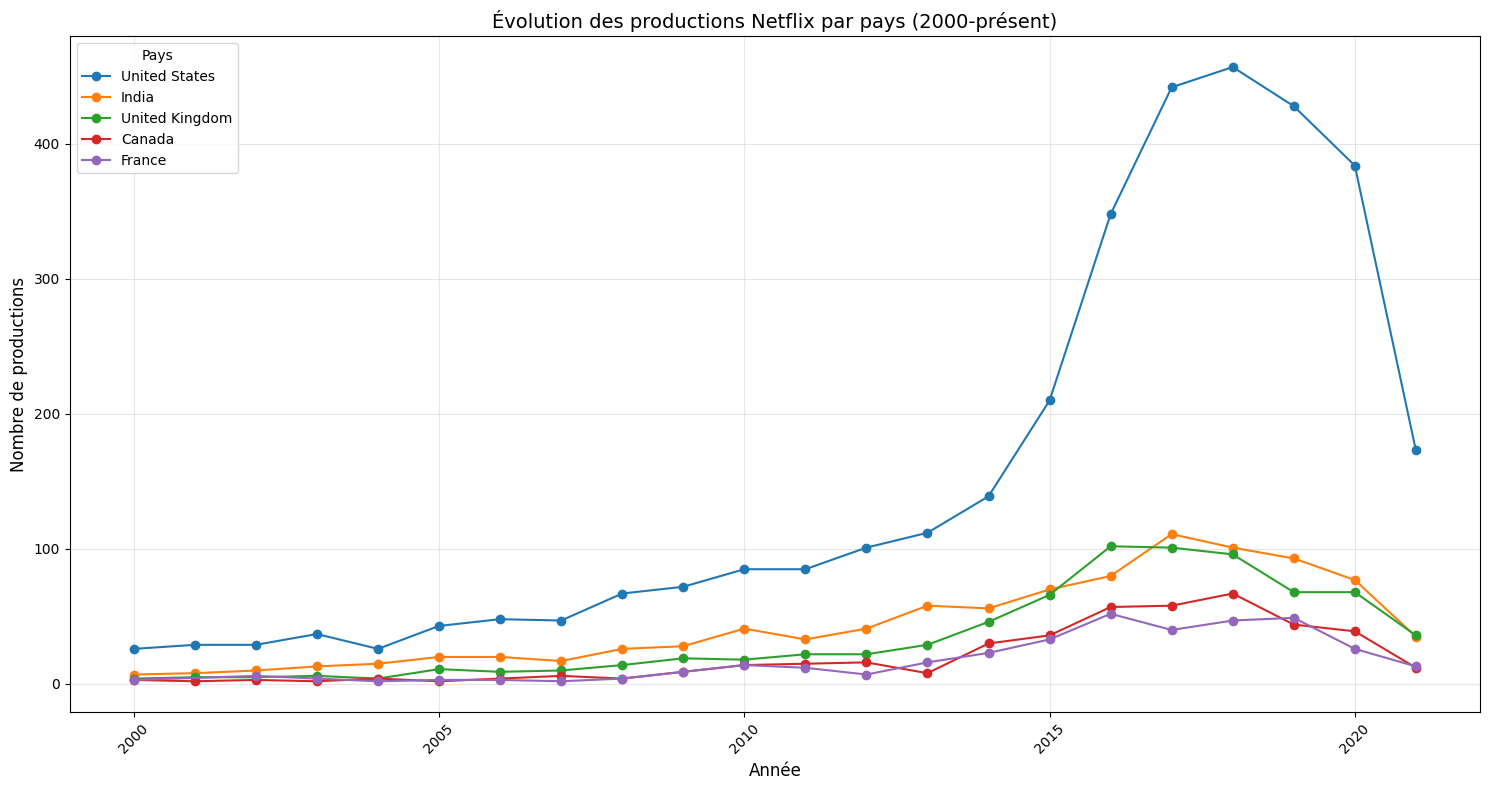

In [36]:
# Analyser les tendances temporelles par pays
# Compter les productions par année pour les 5 principaux pays
top_5_countries = top_10['Pays'].head(5).tolist()

yearly_data = {}
for country in top_5_countries:
    country_data = df[df['country'].str.contains(country, na=False)].copy()
    yearly_counts = country_data['release_year'].value_counts().sort_index()
    recent_years = yearly_counts[yearly_counts.index >= 2000]
    yearly_data[country] = recent_years

plt.figure(figsize=(15, 8))

for country, data in yearly_data.items():
    plt.plot(data.index, data.values, marker='o', linestyle='-', label=country)

plt.title('Évolution des productions Netflix par pays (2000-présent)', fontsize=14)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de productions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Pays')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 9. Visualisation des données par continent


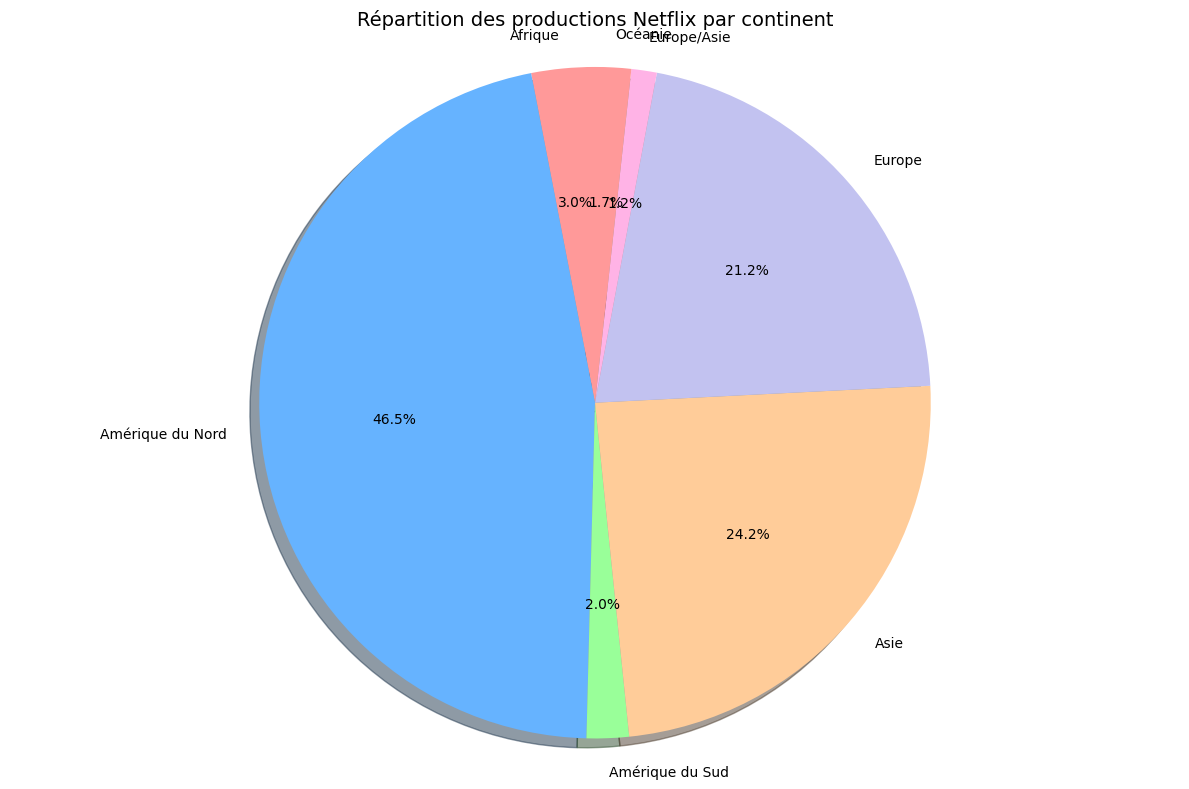

In [37]:
# Définir les continents pour chaque pays
continent_mapping = {
    'United States': 'Amérique du Nord',
    'Canada': 'Amérique du Nord',
    'Mexico': 'Amérique du Nord',
    'Brazil': 'Amérique du Sud',
    'Argentina': 'Amérique du Sud',
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Russia': 'Europe',
    'Poland': 'Europe',
    'Belgium': 'Europe',
    'Netherlands': 'Europe',
    'Switzerland': 'Europe',
    'Turkey': 'Europe/Asie',
    'India': 'Asie',
    'Japan': 'Asie',
    'South Korea': 'Asie',
    'China': 'Asie',
    'Taiwan': 'Asie',
    'Hong Kong': 'Asie',
    'Thailand': 'Asie',
    'Indonesia': 'Asie',
    'Philippines': 'Asie',
    'Singapore': 'Asie',
    'Australia': 'Océanie',
    'Egypt': 'Afrique',
    'South Africa': 'Afrique',
    'Nigeria': 'Afrique'
}

geo_df['Continent'] = geo_df['Pays'].map(continent_mapping)

continent_data = geo_df.groupby('Continent')['Nombre_de_productions'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.pie(continent_data['Nombre_de_productions'], labels=continent_data['Continent'], 
        autopct='%1.1f%%', startangle=90, shadow=True, 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

plt.title('Répartition des productions Netflix par continent', fontsize=14)
plt.axis('equal')  

plt.tight_layout()
plt.show()
